In [178]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer


In [179]:
import os
import numpy as np

import warnings

import sklearn.linear_model
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

x_train_df = pd.read_csv('../data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('../data/data_reviews/y_train.csv')
x_test_df = pd.read_csv('../data/data_reviews/x_test.csv')

In [180]:
x_train = x_train_df['text'] 
x_test = x_test_df['text']
x_train

0       Oh and I forgot to also mention the weird colo...
1                            THAT one didn't work either.
2                                      Waste of 13 bucks.
3       Product is useless, since it does not have eno...
4       None of the three sizes they sent with the hea...
                              ...                        
2395    The sweet potato fries were very good and seas...
2396    I could eat their bruschetta all day it is dev...
2397                                 Ambience is perfect.
2398    We ordered the duck rare and it was pink and t...
2399         Service was good and the company was better!
Name: text, Length: 2400, dtype: object

In [181]:
amazon_i = np.where(x_train_df['website_name']=='amazon')
imdb_i = np.where(x_train_df['website_name']=='imdb')
yelp_i =  np.where(x_train_df['website_name']=='yelp')

## Preprocess

In [182]:
import pandas as pd
import numpy as np
import sklearn.neighbors

from collections import OrderedDict

word_embeddings = pd.read_csv('../data/pretrained_word_embeddings/glove.6B.50d.txt.zip',
                               header=None, sep=' ', index_col=0,
                               nrows=100000, compression='zip', encoding='utf-8', quoting=3)
# Build a dict that will map from string word to 50-dim vector
word_list = word_embeddings.index.values.tolist()
word2vec = OrderedDict(zip(word_list, word_embeddings.values))

## Show some examples

n_words = len(word2vec.keys())
print("word2vec['happy'] = ")
print(word2vec['happy'])

## Try some analogies
def analogy_lookup(a1, a2, b1):
    target_vec = word2vec[a2] - word2vec[a1] + word2vec[b1]
    knn = sklearn.neighbors.NearestNeighbors(n_neighbors=7, metric='euclidean', algorithm='brute')
    knn.fit(word_embeddings.values)
    dists, indices = knn.kneighbors(target_vec[np.newaxis,:])
    print("Query: %s:%s -> %s:____" % (a1, a2, b1))
    for ii, vv in enumerate(indices[0]):
        print("   %20s  at dist %.3f" % (word_list[vv], dists[0,ii]))

analogy_lookup('movie', 'film', 'theater')

word2vec['happy'] = 
[ 0.092086  0.2571   -0.58693  -0.37029   1.0828   -0.55466  -0.78142
  0.58696  -0.58714   0.46318  -0.11267   0.2606   -0.26928  -0.072466
  1.247     0.30571   0.56731   0.30509  -0.050312 -0.64443  -0.54513
  0.86429   0.20914   0.56334   1.1228   -1.0516   -0.78105   0.29656
  0.7261   -0.61392   2.4225    1.0142   -0.17753   0.4147   -0.12966
 -0.47064   0.3807    0.16309  -0.323    -0.77899  -0.42473  -0.30826
 -0.42242   0.055069  0.38267   0.037415 -0.4302   -0.39442   0.10511
  0.87286 ]
Query: movie:film -> theater:____
                theatre  at dist 1.977
                theater  at dist 2.158
                 cinema  at dist 3.639
                  opera  at dist 3.654
                 ballet  at dist 3.729
               ensemble  at dist 3.817
                 studio  at dist 3.967


# process words

In [183]:
pip install autocorrect

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [185]:
from autocorrect import Speller
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
porterstemmer = PorterStemmer()
wnl = WordNetLemmatizer()
spell = Speller()

common_words = pd.read_csv('../data/data_reviews/modified_stopword.txt')

In [186]:
print(common_words['words'])

0              i
1             me
2             my
3         myself
4             we
5            our
6           ours
7      ourselves
8            you
9           your
10         yours
11      yourself
12    yourselves
13            he
14           him
15           his
16       himself
17           she
18           her
19          hers
20       herself
21            it
22           its
23        itself
24          they
25          them
26         their
27        theirs
28    themselves
29          what
30         which
31           who
32          whom
33          this
34          that
35         these
36         those
37            am
38            is
39           are
40           was
41          were
42            be
43          been
44         being
45          have
46           has
47           had
48        having
49            do
50          does
51           did
52         doing
53             a
54            an
55           the
56           and
57            if
58            

In [187]:
stop_words

0           i
1          me
2          my
3      myself
4          we
        ...  
100      will
101      just
102       don
103    should
104       now
Name: words, Length: 105, dtype: object

In [188]:
test_stop_words = pd.Series(stop_words).array

In [189]:
# words_ = ['i', 'hey', 'you']

# if words_[2] not in test_stop_words:
#     print(words_[2])
# #     words_ = [w for w in words_ if w not in stop_words]
# # words_

In [190]:
import re

def simple_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z]", " ", str_input).lower().split()   
    return words

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def stemming_tokenizer(str_input):
    words = decontracted(str_input)
    words = re.sub(r"[^A-Za-z]", " ", str_input).lower().split()
    
    # autocorrect
    test_names = words
    test_names_len = len(words)
    words = [spell(test_names[i]) for i in range(test_names_len)]

    # prune words
#     def prune_food(w):
#         if w == 'bones' or w == 'bone' or w == 'fish' or w == 'worms' or w == 'worm':
#             w = 'food'
#         return w
    
#     words = [prune_food(word) for word in words]
    
    # stemming 
#     porter_stemmer = PorterStemmer()
#     words = [porter_stemmer.stem(word) for word in words]
    
    #remove non important words
#     non_important = ['film', 'movie','apple', 'juice']
#     words = [w for w in words if w not in non_important]
    
#     stop_words = common_words['words']
#     stop_words = pd.Series(stop_words).array
#     words = [w for w in words if w not in stop_words]
    
    return words

In [191]:
words = [stemming_tokenizer(x_train[i]) for i in range(len(x_train))]

flat_list = sum(words, [])
len(flat_list)

flat_list

['oh',
 'and',
 'i',
 'forgot',
 'to',
 'also',
 'mention',
 'the',
 'weird',
 'color',
 'effect',
 'it',
 'has',
 'on',
 'your',
 'phone',
 'that',
 'one',
 'didn',
 't',
 'work',
 'either',
 'waste',
 'of',
 'bucks',
 'product',
 'is',
 'useless',
 'since',
 'it',
 'does',
 'not',
 'have',
 'enough',
 'charging',
 'current',
 'to',
 'charge',
 'the',
 'cellphone',
 'i',
 'was',
 'planning',
 'to',
 'use',
 'it',
 'with',
 'none',
 'of',
 'the',
 'three',
 'sizes',
 'they',
 'sent',
 'with',
 'the',
 'headset',
 'would',
 'stay',
 'in',
 'my',
 'ears',
 'worst',
 'customer',
 'service',
 'the',
 'engage',
 'is',
 'still',
 'lacking',
 'in',
 'earbuds',
 'it',
 'always',
 'cuts',
 'out',
 'and',
 'makes',
 'a',
 'been',
 'been',
 'been',
 'sound',
 'then',
 'says',
 'signal',
 'failed',
 'the',
 'only',
 'very',
 'disappointing',
 'thing',
 'was',
 'there',
 'was',
 'no',
 'speakerphone',
 'very',
 'disappointed',
 'in',
 'accessoryone',
 'basically',
 'the',
 'service',
 'was',
 'very

In [192]:
len(flat_list)

28937

In [193]:
words_te = [stemming_tokenizer(x_test[i]) for i in range(len(x_test))]

flat_list_te = sum(words_te, [])
len(flat_list_te)

7195

## Taking the Average

In [194]:
keys = word2vec.keys()

In [195]:
x_tr = []

for x in range(len(words)):
    filtered_init = []
    for i in range(len(words[x])):
        if (words[x][i] in keys):
            filtered_init.append(words[x][i])
            filtered = set(filtered_init)
        t = [word2vec[w].reshape(50) for w in filtered]
    x_tr.append(np.average(t, axis=0))

# x = np.array(x_tr)
x_tr

[array([ 2.27492394e-01,  2.71890438e-01,  2.33111250e-02, -5.44937500e-02,
         3.28966125e-01,  5.61015000e-02, -3.28511875e-01, -1.54802563e-01,
        -1.80857577e-01,  1.41382411e-01,  2.24468750e-03,  2.90243313e-01,
        -2.43689875e-01, -6.01350000e-02,  4.76835719e-01,  3.63811875e-01,
        -2.48924812e-01, -3.72113125e-02, -1.11023375e-01, -4.21776313e-01,
         2.85201250e-02,  1.91316500e-01,  4.34867750e-01,  6.84978750e-02,
         3.22932125e-01, -1.58827850e+00, -7.21532313e-01,  2.95250812e-01,
         4.60154750e-01, -5.33041250e-01,  2.96686250e+00,  2.29191525e-01,
        -2.80384937e-01, -2.51196875e-01, -2.24072544e-02, -8.90863812e-02,
         1.62166250e-01,  1.02623875e-01,  3.78294375e-02, -1.30695000e-01,
         6.39304813e-02,  2.10805125e-01, -1.94016688e-01,  1.23212250e-01,
        -5.13953125e-02,  1.19507937e-01, -9.21896250e-03, -9.51979375e-02,
         6.76542500e-03,  1.43441437e-01]),
 array([ 0.281963  ,  0.13245333,  0.3476833

In [196]:
x_te = []

for x in range(len(words_te)):
    filtered_init = []
    for i in range(len(words_te[x])):
        if (words_te[x][i] in keys):
            filtered_init.append(words_te[x][i])
            filtered = set(filtered_init)
        t = [word2vec[w].reshape(50) for w in filtered]
    x_te.append(np.average(t, axis=0))

x_test = np.array(x_te)

**Note: tense, persons**

## Taking the Max

In [120]:
x_tr = []

for x in range(len(words)):
    filtered = []
    for i in range(len(words[x])):
        if (words[x][i] in keys):
            filtered.append(words[x][i])
        t = [word2vec[w].reshape(50) for w in filtered]
    x_tr.append(np.max(t, axis=0))

X = np.array(x_tr)
X.shape

(2400, 50)

In [172]:
x_te = []

for x in range(len(words_te)):
    filtered = []
    for i in range(len(words_te[x])):
        if (words_te[x][i] in keys):
            filtered.append(words_te[x][i])
        t = [word2vec[w].reshape(50) for w in filtered]
    x_te.append(np.max(t, axis=0))

x_test = np.array(x_te)

# Logistic Regression #

In [197]:
X = np.array(x_tr)
y = y_train_df['is_positive_sentiment'].to_numpy()
# feat_num = X.shape

In [198]:
import sklearn.metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

### CV without best C

In [142]:
print("-----------------\nClassify with base data, 3 folds\n-----------------")

k = 3
kfold = KFold(n_splits=k)
train_scores = []
test_scores = []
model = LogisticRegression()

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model.fit(X_train, y_train)
    pred_train = model.predict_proba(X_train)
    pred_test = model.predict_proba(X_test)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    print("Train score: ", score_train)
    print("Test score: ", score_test)
    
    train_scores.append(score_train)
    test_scores.append(score_test)
    
print("\nAverage train accuracy: ", np.average(score_train))
print("Average test accuracy: ", np.average(score_test))

-----------------
Classify with base data, 3 folds
-----------------
Train score:  0.783125
Test score:  0.75875
Train score:  0.7875
Test score:  0.73875
Train score:  0.775625
Test score:  0.755

Average train accuracy:  0.775625
Average test accuracy:  0.755


### CV with the best C

In [149]:
C_grid = np.logspace(-9, 6, 100)
model_list = []
aver_train_score = []
aver_test_score = []
aver_train_loss = []
aver_test_loss = []


for C in C_grid:
    k = 3
    kfold = KFold(n_splits=k)
    
    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []

    model = sklearn.linear_model.LogisticRegression(C=C,solver='liblinear')
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        pred_train = model.predict_proba(X_train)
        pred_test = model.predict_proba(X_test)

        # Score
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)
#         print("Train score: ", score_train)
#         print("Test score: ", score_test)
        train_scores.append(score_train)
        test_scores.append(score_test)
        
        # Log loss
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
#         print("Train loss: ", log_loss_train)
#         print("Test loss: ", log_loss_test)
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)
        
        
    print("\nFor C value : ", C)
    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("\nAverage train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))
    
    print('------------------------------------------------\n')
    
    model_list.append(model)
    aver_train_score.append(np.average(score_train))
    aver_test_score.append(np.average(score_test))
    aver_train_loss.append(np.average(train_loss))
    aver_test_loss.append(np.average(test_loss))


For C value :  1e-09

Average train accuracy:  0.70625
Average test accuracy:  0.72625

Average train loss:  0.6931471549547171
Average test loss:  0.6931471585563506
------------------------------------------------


For C value :  1.4174741629268078e-09

Average train accuracy:  0.70625
Average test accuracy:  0.72625

Average train loss:  0.6931471442651987
Average test loss:  0.6931471493704208
------------------------------------------------


For C value :  2.009233002565046e-09

Average train accuracy:  0.70625
Average test accuracy:  0.72625

Average train loss:  0.6931471291130853
Average test loss:  0.693147136349605
------------------------------------------------


For C value :  2.848035868435805e-09

Average train accuracy:  0.70625
Average test accuracy:  0.72625

Average train loss:  0.6931471076353616
Average test loss:  0.6931471178929399
------------------------------------------------


For C value :  4.0370172585965495e-09

Average train accuracy:  0.70625
Average


For C value :  0.0004037017258596558

Average train accuracy:  0.7375
Average test accuracy:  0.7625

Average train loss:  0.6834421993727179
Average test loss:  0.6847041607380221
------------------------------------------------


For C value :  0.0005722367659350221

Average train accuracy:  0.7375
Average test accuracy:  0.75875

Average train loss:  0.6797187769501528
Average test loss:  0.6814323654278187
------------------------------------------------


For C value :  0.0008111308307896872

Average train accuracy:  0.74125
Average test accuracy:  0.75625

Average train loss:  0.6747302346706255
Average test loss:  0.6770269455705659
------------------------------------------------


For C value :  0.0011497569953977356

Average train accuracy:  0.741875
Average test accuracy:  0.75625

Average train loss:  0.668179182437619
Average test loss:  0.6712059875094437
------------------------------------------------


For C value :  0.0016297508346206436

Average train accuracy:  0.7


For C value :  114.97569953977356

Average train accuracy:  0.77875
Average test accuracy:  0.75125

Average train loss:  0.4585276886336245
Average test loss:  0.5158446465332553
------------------------------------------------


For C value :  162.97508346206467

Average train accuracy:  0.778125
Average test accuracy:  0.7525

Average train loss:  0.4585087374412378
Average test loss:  0.5160334557546451
------------------------------------------------


For C value :  231.0129700083158

Average train accuracy:  0.78
Average test accuracy:  0.7525

Average train loss:  0.45849795249611586
Average test loss:  0.516189242416711
------------------------------------------------


For C value :  327.4549162877732

Average train accuracy:  0.779375
Average test accuracy:  0.75125

Average train loss:  0.4584921697003102
Average test loss:  0.5163041007684416
------------------------------------------------


For C value :  464.15888336127915

Average train accuracy:  0.78
Average test ac

In [150]:
# print out the results in clear tabular format
pd.DataFrame(np.transpose([aver_train_score, aver_test_score, aver_train_loss, aver_test_loss]), columns=['train accuracy', 'test accuracy', 'train loss', 'test loss'])

,train accuracy,test accuracy,train loss,test loss
0,0.70625,0.72625,0.693147,0.693147
1,0.70625,0.72625,0.693147,0.693147
2,0.70625,0.72625,0.693147,0.693147
3,0.70625,0.72625,0.693147,0.693147
4,0.70625,0.72625,0.693147,0.693147
...,...,...,...,...
95,0.78000,0.75125,0.458486,0.516607
96,0.78000,0.75125,0.458486,0.516607
97,0.78000,0.75125,0.458486,0.516608
98,0.78000,0.75125,0.458486,0.516608


#### Best Log loss

In [151]:
min_loss = min(aver_test_loss)
index_N2 = aver_test_loss.index(min_loss)
best_C =  C_grid[index_N2]
best_model = model_list[index_N2]
min_loss

0.5044900218367943

#### stability across Kfolds

In [52]:
print("-----------------\nClassify with base data, 5 folds\n-----------------")

K = [2,3,4,5,6,7,8,9,10,11,12]
K_train_loss = []
K_test_loss = []
for k in K:
    kfold = KFold(n_splits=k)
    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []
    
    for train_idx, test_idx in kfold.split(X):
        shuffler = np.random.permutation(len(X))
        X_shuffled = X[shuffler]
        y_shuffled = y[shuffler]
        X_train, X_test = X_shuffled[train_idx,:], X_shuffled[test_idx,:]
        y_train, y_test = y_shuffled[train_idx], y_shuffled[test_idx]

        model.fit(X_train, y_train)
        pred_train = best_model.predict_proba(X_train)
        pred_test = best_model.predict_proba(X_test)

        score_train = best_model.score(X_train, y_train)
        score_test = best_model.score(X_test, y_test)
        train_scores.append(score_train)
        test_scores.append(score_test)
        
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
        
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)

    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("Average train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))
    
    K_train_loss.append(np.average(train_loss))
    K_test_loss.append(np.average(test_loss))

-----------------
Classify with base data, 5 folds
-----------------

Average train accuracy:  0.7225
Average test accuracy:  0.7116666666666667
Average train loss:  0.5484789388766017
Average test loss:  0.5581696604301678

Average train accuracy:  0.718125
Average test accuracy:  0.715
Average train loss:  0.5543048864735839
Average test loss:  0.5513631260129865

Average train accuracy:  0.7061111111111111
Average test accuracy:  0.75
Average train loss:  0.5525826702976435
Average test loss:  0.5555491877206085

Average train accuracy:  0.7130208333333333
Average test accuracy:  0.7333333333333333
Average train loss:  0.5514763822300082
Average test loss:  0.5607159693468909

Average train accuracy:  0.72
Average test accuracy:  0.7025
Average train loss:  0.5525792361764784
Average test loss:  0.5570496170379163

Average train accuracy:  0.7240038872691934
Average test accuracy:  0.6754385964912281
Average train loss:  0.5513371312085718
Average test loss:  0.5652676565520881

Ave

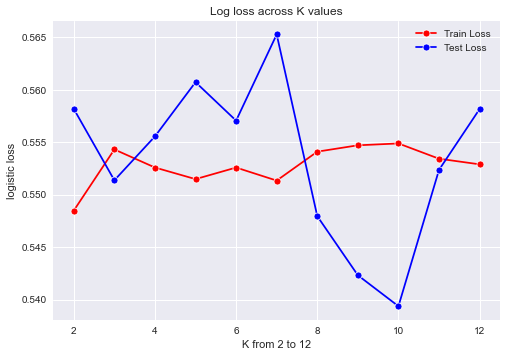

standard deviation for training set: 0.002  
standard deviation for testing set: 0.007  


In [53]:
plt.xlabel('K from 2 to 12');
plt.ylabel('logistic loss');

sns.lineplot(x = K, y = K_train_loss, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = K, y = K_test_loss, label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Log loss across K values')
plt.show()


print('standard deviation for training set: %.3f  ' %np.std(K_train_loss))
print('standard deviation for testing set: %.3f  ' %np.std(K_test_loss))

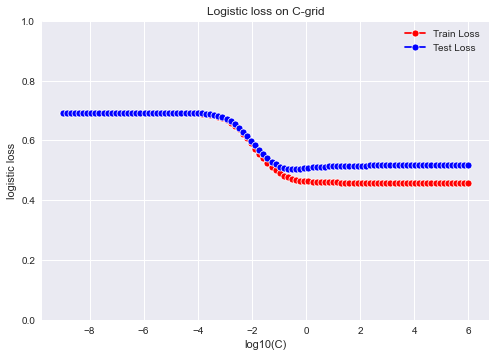

Best C-value for LR: 0.305
Test set log-loss at best C-value: 0.5045


In [152]:
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1]);

sns.lineplot(x = np.log10(C_grid), y = aver_train_loss, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = np.log10(C_grid), y = aver_test_loss,label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Logistic loss on C-grid')
plt.show()

print("Best C-value for LR: %.3f" % best_C) 
print("Test set log-loss at best C-value: %.4f" % min_loss)

#### Result

In [172]:
yproba1_test = best_model.predict_proba(x_test)[:, 1] 
np.savetxt('yproba1_test.txt', yproba1_test)

In [210]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'solver':['liblinear'],'C':[0.305]}
model = sklearn.linear_model.LogisticRegression()
clf = GridSearchCV(model, parameters,cv=4)
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([0.01318574]),
 'std_fit_time': array([0.00112949]),
 'mean_score_time': array([0.00077999]),
 'std_score_time': array([0.00037292]),
 'param_C': masked_array(data=[0.305],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['liblinear'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.305, 'solver': 'liblinear'}],
 'split0_test_score': array([0.78333333]),
 'split1_test_score': array([0.73166667]),
 'split2_test_score': array([0.76333333]),
 'split3_test_score': array([0.75]),
 'mean_test_score': array([0.75708333]),
 'std_test_score': array([0.01886999]),
 'rank_test_score': array([1], dtype=int32)}

# Labeled data

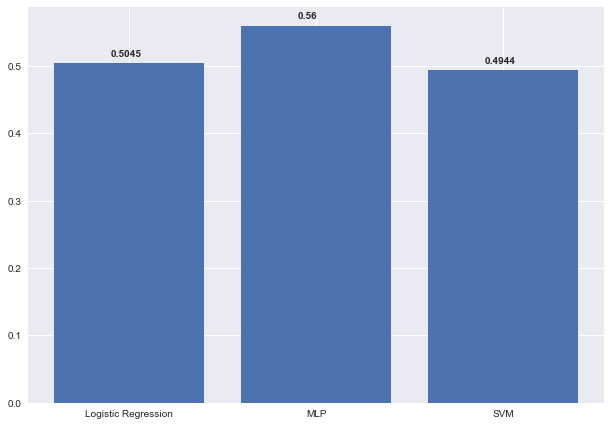

In [212]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
x = ['Logistic Regression', 'MLP', 'SVM']
students = [0.5045,0.5600,0.4944]
ax.bar(x,students,label=students)

for i, v in enumerate(students):
    ax.text(i-0.1, v+0.01,str(v), fontweight='bold')
# tick_label(students)
# for index, value in enumerate(students):
#     plt.text(value, str(value))
plt.show()

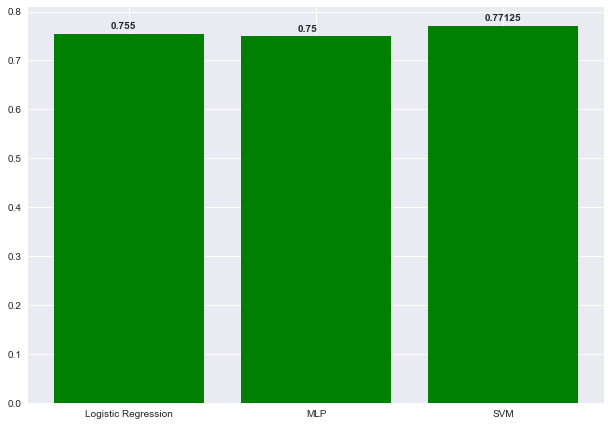

In [211]:
# ACCURACY
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
langs = ['Logistic Regression', 'MLP', 'SVM']
students = [0.755,0.75,0.77125]
ax.bar(langs,students,color='green')

for i, v in enumerate(students):
    ax.text(i-0.1, v+0.01,str(v), fontweight='bold')
plt.show()

# Testing data

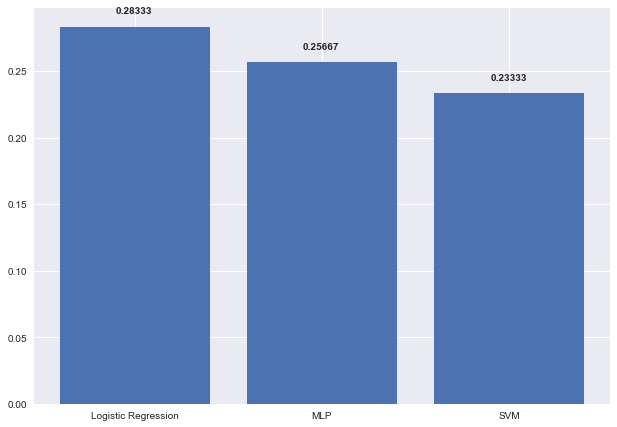

In [215]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
x = ['Logistic Regression', 'MLP', 'SVM']
students = [0.28333,0.25667,0.23333]
ax.bar(x,students,label=students)

for i, v in enumerate(students):
    ax.text(i-0.1, v+0.01,str(v), fontweight='bold')
# tick_label(students)
# for index, value in enumerate(students):
#     plt.text(value, str(value))
plt.show()

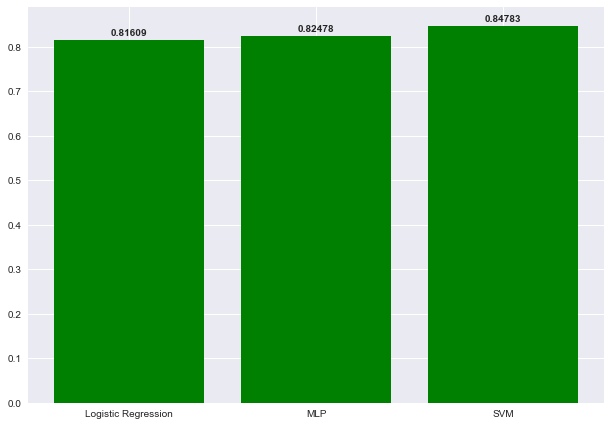

In [216]:
# ACCURACY
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
langs = ['Logistic Regression', 'MLP', 'SVM']
students = [0.81609,0.82478,0.84783]

ax.bar(langs,students,color='green')

for i, v in enumerate(students):
    ax.text(i-0.1, v+0.01,str(v), fontweight='bold')
plt.show()